In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from pandas import read_csv
from shutil import rmtree
from tempfile import mkdtemp
import tensorflow as tf
from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Conv2D, Dense,LSTM
from matplotlib import pyplot

#cwd = os.chdir(r"C:\Users\Tazin\Documents\Thesis_TFP\ifterkar vi") 
cwd = os.chdir(r"C:\Users\ARIF\Desktop\LSTM") 

DATA = pd.read_csv('data1.csv')        

CASESd = np.array(DATA.loc[:, "Intensity"])

In [3]:

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-1):
        X.append(series[i:i+1])
        Y.append(series[i+1])
    return X, Y

In [4]:
X_CASESd, Y_CASESd = extract_sample(CASESd)

In [5]:
def train_test(neural_network, X, Y, epochs=5000, training_percent_size = 0.8):
   
    N = len(X)
   
    n_training = int(N*training_percent_size)
    X_TRAINING, Y_TRAINING = np.array(X[:n_training]), np.array(Y[:n_training])
    X_TESTING, Y_TESTING = np.array(X[n_training:]), np.array(Y[n_training:])
   
    X_TRAINING = X_TRAINING.reshape((X_TRAINING.shape[0], X_TRAINING.shape[1], 1))
    X_TESTING = X_TESTING.reshape((X_TESTING.shape[0], X_TESTING.shape[1], 1))
    
    for i in range(epochs):
        neural_network.fit(X_TRAINING, Y_TRAINING, epochs = 1, verbose = 0, shuffle = False)
        neural_network.reset_states()
    Y_PREDICTED = []   
    for x in X_TESTING:
        x = x.reshape((1, 1, 1))
        y = neural_network.predict(x, verbose = 0)
        Y_PREDICTED.append(y[0][0])

    plt.ylabel("Intensity", fontsize="large")
    plt.xlabel("Days", fontsize="large")
    plt.plot(Y, 'r', label='Real')
    plt.plot(range(n_training, N), Y_PREDICTED, 'b', label='Predicted')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
    plt.show()
   
    plt.style.use('classic')
    
  
    loss= np.linalg.norm(Y_TESTING - np.array(Y_PREDICTED))**2/len(Y_TESTING)
      
    print("loss value =",loss)
    print("predicted value =",Y_PREDICTED)
   
    return np.concatenate((Y_TRAINING, Y_PREDICTED))


In [6]:
nn = Sequential()
nn.add(LSTM(10, input_shape = (1, 1), return_sequences=True))
nn.add(LSTM(10))
nn.add(Dense(1)) 
nn.compile(loss="mean_squared_error", optimizer="adam")

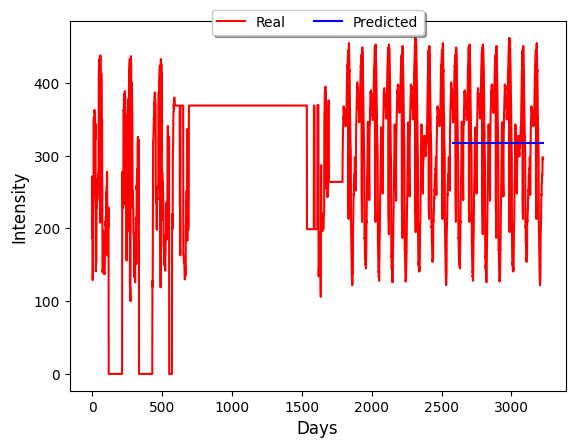

loss value = 8303.69364082941
predicted value = [318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.05508, 318.0

In [7]:
prediction1 = train_test(nn, X_CASESd, Y_CASESd)